In [411]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [412]:
filename= "/home/renzo/Documents/RLE/Codigos/rle_127/solo12-pybullet/telemetria/fuerzas_sin_wedge10.csv"
data = pd.read_csv(filename)
data[["FR"]] = data[["FR"]].abs()
data[["FL"]] = data[["FL"]].abs()
data[["BR"]] = data[["BR"]].abs()
data[["BL"]] = data[["BL"]].abs()
data.head(5)

,t,FR,FL,BR,BL,n_FR,n_FL,n_BR,n_BL,t_FL_HAA,...,z_FR,x_FL,y_FL,z_FL,x_HR,y_HR,z_HR,x_HL,y_HL,z_HL
0,0.006427,0.352735,0.340128,0.352636,0.340224,0.352735,2.993542,10.122513,10.550141,-2.954311,...,0.019103,0.194600,0.168910,0.019103,-0.194600,-0.168910,0.019103,-0.194600,0.168910,0.019103
1,0.022464,0.226111,0.217266,0.226170,0.217208,5.793666,6.162920,0.226170,2.115416,-2.092121,...,0.015338,0.193671,0.164465,0.015338,-0.193671,-0.164465,0.015338,-0.193671,0.164465,0.015338
2,0.040888,0.067233,0.061632,0.067198,0.061666,0.067233,1.470533,3.182772,3.505324,-1.442272,...,0.012307,0.192931,0.160931,0.012307,-0.192931,-0.160931,0.012307,-0.192931,0.160931,0.012307
3,0.046367,0.018654,0.014996,0.018670,0.014980,1.756618,2.004661,0.018670,0.966636,-0.951623,...,0.009869,0.192341,0.158119,0.009869,-0.192341,-0.158119,0.009869,-0.192341,0.158119,0.009869
4,0.049913,0.000000,0.000000,0.000000,0.000000,0.000000,0.609232,0.906667,1.092261,-0.581529,...,0.007910,0.191870,0.155878,0.007910,-0.191870,-0.155878,0.007910,-0.191870,0.155878,0.007910


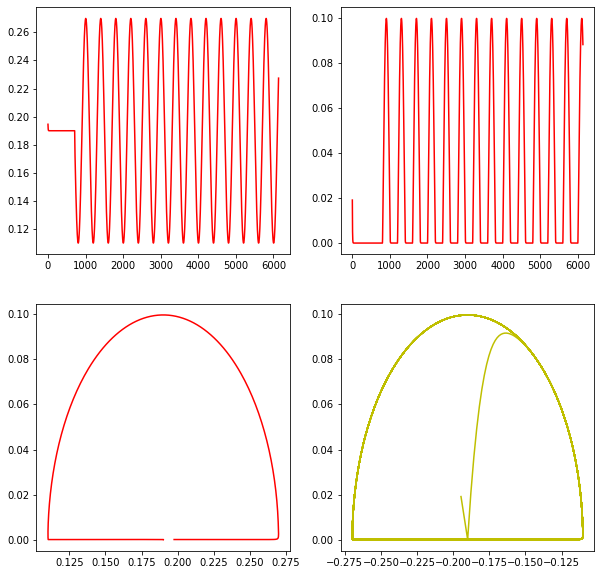

In [413]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

a = 1100
axs[0,0].plot(data[["x_FL"]],'r')
#axs[0,0].plot(data[["t"]], data[["x_FL"]],'b')
#axs[0,0].plot(data[["t"]], data[["x_HR"]],'g')
#axs[0,0].plot(data[["t"]], data[["x_HL"]],'y')

axs[0,1].plot(data[["z_FL"]],'r')
#axs[0,1].plot(data[["t"]], data[["z_FL"]],'b')
#axs[0,1].plot(data[["t"]], data[["z_HR"]],'g')
#axs[0,1].plot(data[["t"]], data[["z_HL"]],'y')

axs[1,0].plot(data[["x_FL"]][100:a], data[["z_FL"]][100:a],'r')
#axs[1,0].plot(data[["x_FL"]][0:500], data[["z_FL"]][0:500],'b')
#axs[1,1].plot(data[["x_HR"]], data[["z_HR"]],'g')
axs[1,1].plot(data[["x_HL"]], data[["z_HL"]],'y')


plt.show()

In [414]:
def plot_data(data, axs, ix, iy, colx, coly, xlab, ylab, tit):
    axs[ix,iy].plot(data[[colx]], data[[coly]])
    axs[ix,iy].set_xlabel(xlab)
    axs[ix,iy].set_ylabel(ylab)
    axs[ix,iy].set_title(tit)

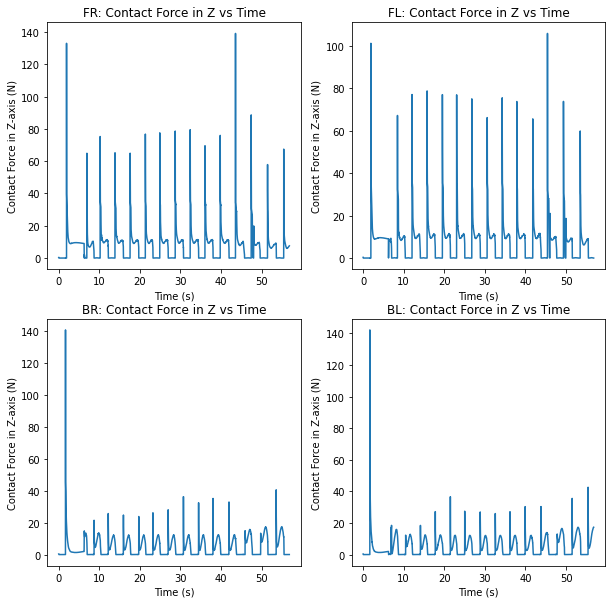

In [415]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "FR", "Time (s)", "Contact Force in Z-axis (N)", "FR: Contact Force in Z vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "FL", "Time (s)", "Contact Force in Z-axis (N)", "FL: Contact Force in Z vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "BR", "Time (s)", "Contact Force in Z-axis (N)", "BR: Contact Force in Z vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "BL", "Time (s)", "Contact Force in Z-axis (N)", "BL: Contact Force in Z vs Time")

plt.show()

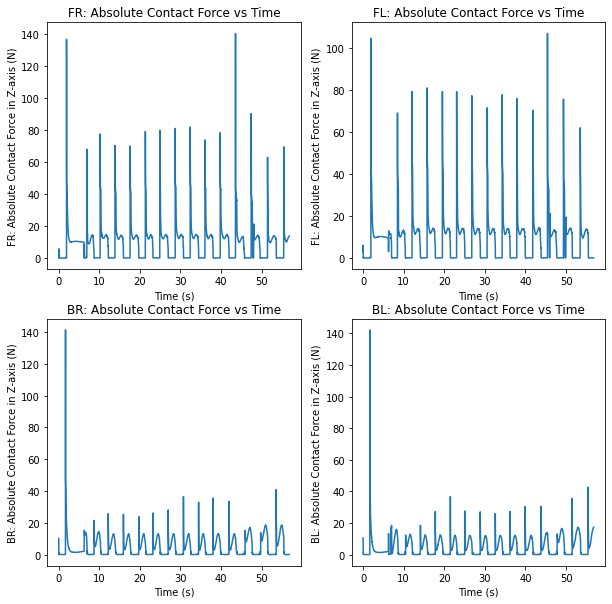

In [416]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "n_FR", "Time (s)", "FR: Absolute Contact Force in Z-axis (N)", "FR: Absolute Contact Force vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "n_FL", "Time (s)", "FL: Absolute Contact Force in Z-axis (N)", "FL: Absolute Contact Force vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "n_BR", "Time (s)", "BR: Absolute Contact Force in Z-axis (N)", "BR: Absolute Contact Force vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "n_BL", "Time (s)", "BL: Absolute Contact Force in Z-axis (N)", "BL: Absolute Contact Force vs Time")

plt.show()

In [417]:
def estadisticas_fuerza(data,col):
    stats = []
    stats.append(data[[col]][500::].mean()[0])
    stats.append(data[[col]][500::].max()[0])
    stats.append(data[[col]][500::].min()[0])
    print("media",col,":",stats[0])
    print("max:",col,":",stats[1])
    print("min:",col,":",stats[2])
    return stats


In [418]:
stats_FR = estadisticas_fuerza(data,"FL")
stats_FL = estadisticas_fuerza(data,"FR")
stats_BR = estadisticas_fuerza(data,"BL")
stats_BL = estadisticas_fuerza(data,"BR")


media FL : 6.88118234592545
max: FL : 105.83183831929504
min: FL : 0.0
media FR : 6.984674688122287
max: FR : 139.12065341623065
min: FR : 0.0
media BL : 4.317696726083999
max: BL : 42.59892777957619
min: BL : 0.0
media BR : 4.215092930213296
max: BR : 40.551845827641
min: BR : 0.0


In [419]:
data[["FR"]].min()[0]

0.0